In [55]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [56]:
placement_data= pd.read_csv('placement.csv')
placement_data

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [57]:
placement_data.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


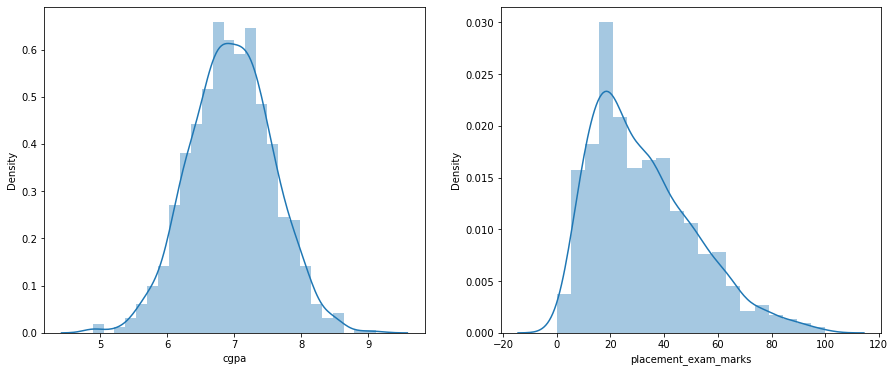

In [58]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(placement_data['cgpa'])

plt.subplot(1,2,2)
sns.distplot(placement_data['placement_exam_marks'])
plt.show()

In [59]:
# As placement_exam_marks is not normally distributed hence we can handle outliers if any using IQR

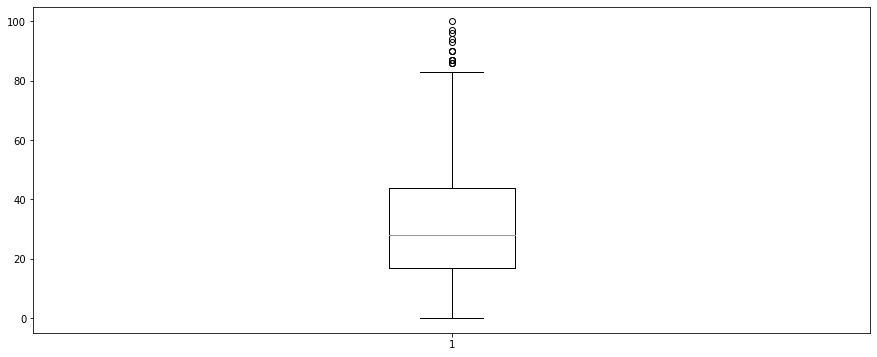

In [60]:
plt.figure(figsize=(15,6))
plt.boxplot(placement_data['placement_exam_marks'])
plt.show()

## Finding the IQR (Interquartile Range)

In [61]:
percentile25= placement_data['placement_exam_marks'].quantile(0.25)
percentile75= placement_data['placement_exam_marks'].quantile(0.75)

In [62]:
percentile75

44.0

In [63]:
percentile25

17.0

In [64]:
iqr= percentile75-percentile25
iqr

27.0

In [65]:
upper_limit= percentile75+1.5*iqr
lower_limit= percentile25-1.5*iqr

In [66]:
print('upper limit is :', upper_limit)
print('lower limit is :', lower_limit)

upper limit is : 84.5
lower limit is : -23.5


## Finding the Outliers

In [67]:
placement_data[placement_data['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [68]:
placement_data[placement_data['placement_exam_marks']<lower_limit]

,cgpa,placement_exam_marks,placed


## Outliers Handling

- Data Trimming
- Data Capping

### 1. Trimming 

In [69]:
placement_data.shape

(1000, 3)

In [70]:
new_df = placement_data[placement_data['placement_exam_marks'] < upper_limit]

In [71]:
new_df.shape

(985, 3)

In [72]:
# Compairing

<AxesSubplot:xlabel='placement_exam_marks'>

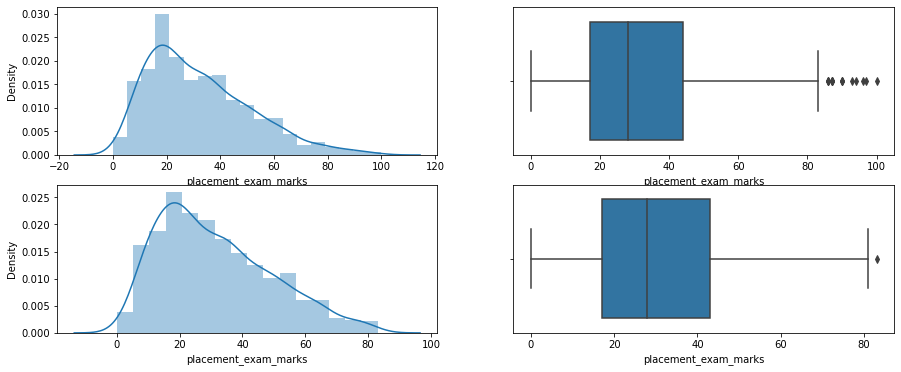

In [75]:
plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
sns.distplot(placement_data['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(placement_data['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

## 2. Capping

In [79]:
cap_place= placement_data.copy()
cap_place.shape

(1000, 3)

In [80]:
cap_place['placement_exam_marks']= np.where(cap_place['placement_exam_marks']>upper_limit,
                                            upper_limit,
                                            np.where(cap_place['placement_exam_marks']<lower_limit,
                                                    lower_limit,
                                                    cap_place['placement_exam_marks']
                                                    )
                                           )

In [81]:
cap_place.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.136500,0.489000
std,0.615898,18.865419,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,84.500000,1.000000


<AxesSubplot:xlabel='placement_exam_marks'>

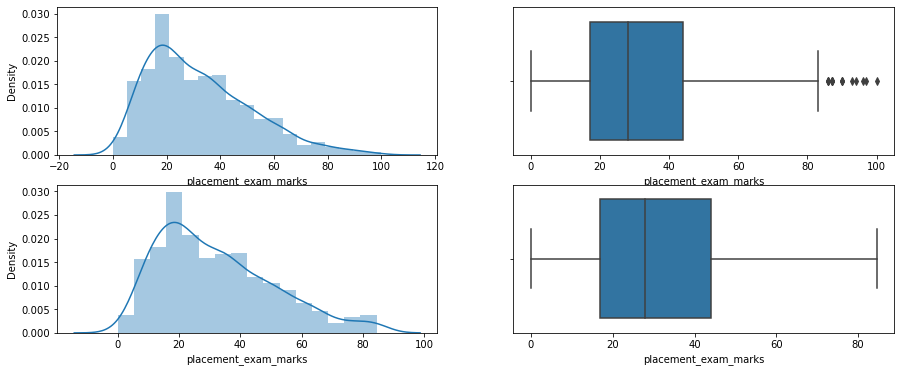

In [82]:
plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
sns.distplot(placement_data['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(placement_data['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(cap_place['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(cap_place['placement_exam_marks'])